In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn import naive_bayes, svm, neighbors
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from scipy import stats
import scikitplot as skplt
from collections import Counter
import joblib

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline

# Custom colors
class clr:
    S = '\033[1m' + '\033[36m'
    E = '\033[0m'

In [2]:
# Importing and Reading Datasets
# Replace this path with the actual path to your data_folder
data_folder = r'C:\Users\ljfit\Desktop\UCD Assignment 2\spambase'

# Read feature names from the names file
names_file_path = os.path.join(data_folder, 'spambase.names')
with open(names_file_path, 'r') as names_file:
    lines = names_file.readlines()
    feature_names = [line.strip().split(':')[0] for line in lines[33:]]

# Read data from the .data file and join with .names files
data_file_path = os.path.join(data_folder, 'spambase.data')
nmpy = pd.read_csv(data_file_path, header=None, names=feature_names)

# Display the first few rows of the combined DataFrame
print(nmpy.head())

# This will convert the column names to a list
column_names = nmpy.columns.tolist()
print(column_names)

print("\n")

# Check if column headers and data line up
if len(nmpy.columns) == len(feature_names):
    print("Column headers and data line up.")
else:
    print("Column headers and data do not line up.")

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [3]:
# Descriptive statistics
# print(nmpy.shape)
print(nmpy.describe())
# print(nmpy.info())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

In [4]:
# Display the first few rows of the combined DataFrame
print(nmpy['spam/ham'].value_counts())
# Get value counts as percentages
percentages = nmpy['spam/ham'].value_counts(normalize=True) * 100

# Print the percentages
print(percentages)

0    2788
1    1813
Name: spam/ham, dtype: int64
0    60.595523
1    39.404477
Name: spam/ham, dtype: float64


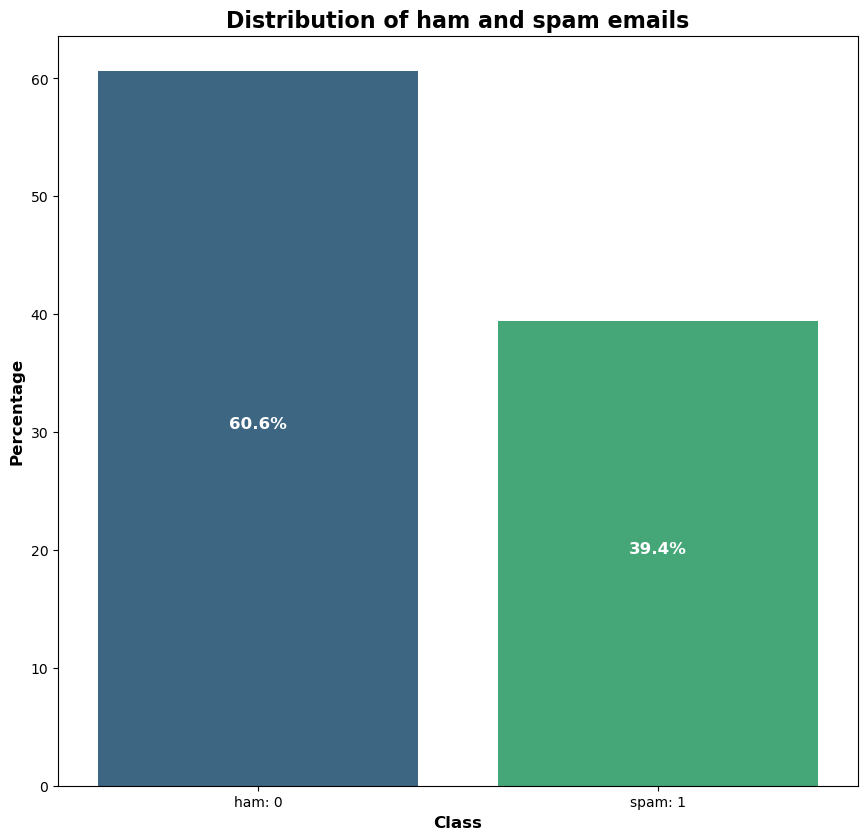

In [5]:
# Create a bar plot using the calculated percentages
fig, ax = plt.subplots(figsize=(10, 10))

# Adjust subplot parameters
fig.subplots_adjust(left=0.2, right=1.0, top=0.95, bottom=0.2)

# Plot the percentages with seaborn
sns.barplot(x=percentages.index, y=percentages, ax=ax, palette="viridis")

# Modify x-tick labels
ax.set_xticklabels(['ham: 0', 'spam: 1'])

# Add percentages inside the bars
for i, v in enumerate(percentages):
    ax.text(i, v/2, "{:.1f}%".format(v), ha='center', size=12, color='white', fontweight='bold')

# Plot
ax.set_xlabel('Class', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage', fontsize=12, fontweight='bold')
plt.title('Distribution of ham and spam emails', fontsize=16, fontweight='bold')

# Show the plot
plt.show()
# No class imbalance

In [6]:
# Convert numpy array to a Dataframe
df = pd.DataFrame(nmpy)

# Check for missing values
print(df.isnull().sum())

# Check for duplicate columns
print(df.T.duplicated().sum())

# Remove duplicate columns
df = df.loc[:, ~nmpy.columns.duplicated()]

# Check for duplicate rows
print(df.duplicated().sum())

# Create a unique feature combination variable for duplicate rows.
duplicate_rows_1 = df[df.duplicated()]

print(df.shape)
print(df.columns)

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

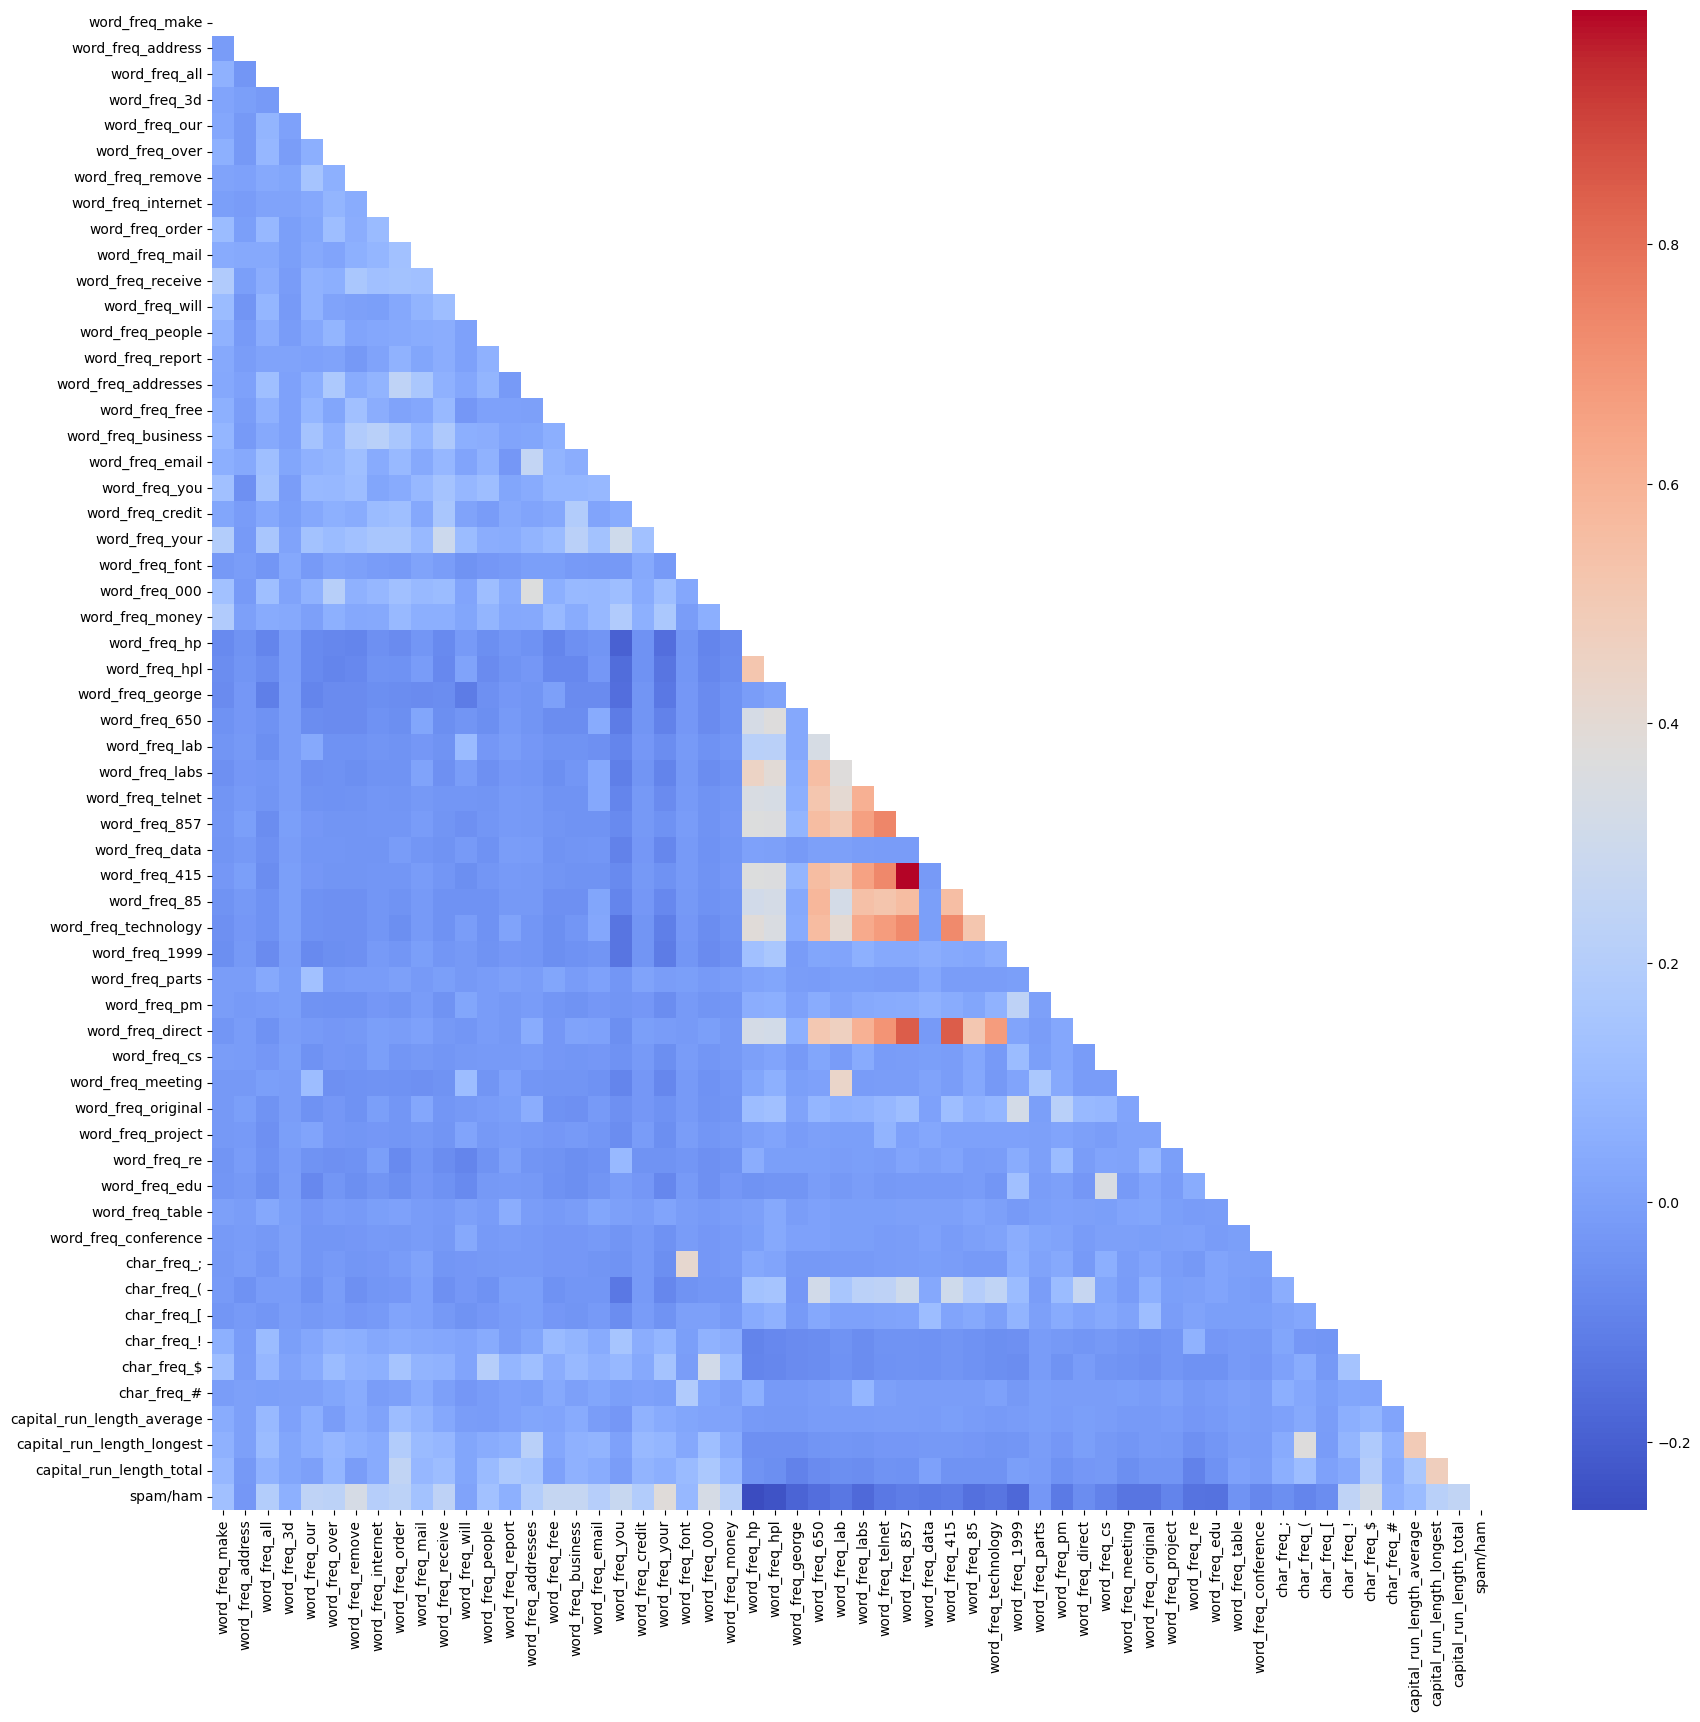

In [7]:
# Create a heatmap of the correlation matrix
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(20, 20))
plt.subplots_adjust(left=0.2, right=1.0, top=0.95, bottom=0.2)

# Apply the mask and cmap for the heatmap
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm')

plt.show()

In [8]:
def count_high_correlations(df, threshold=0.3):
    corr_matrix = df.corr()
    column_counts = {}

    for col in corr_matrix:
        count = (abs(corr_matrix[col]) >= threshold).sum() - 1  # -1 to exclude self-correlation
        if count > 0:                                           # only include columns with count > 0
            column_counts[col] = count

    return column_counts

# Create a copy of dataframe for feature engineering
feature_df = df.copy()

high_corr_counts = count_high_correlations(feature_df, 0.3)

# Convert dictionary to DataFrame
count_df = pd.DataFrame(list(high_corr_counts.items()), columns=['feature_label', 'High Correlation Count'])
count_df_features = count_df.sort_values(by='High Correlation Count', ascending=False)
print(count_df_features.head(10))
print(type(count_df))

           feature_label  High Correlation Count
12         word_freq_857                      11
13         word_freq_415                      11
8          word_freq_650                      11
14          word_freq_85                      10
17      word_freq_direct                      10
15  word_freq_technology                      10
10        word_freq_labs                      10
11      word_freq_telnet                      10
6           word_freq_hp                       9
7          word_freq_hpl                       9
<class 'pandas.core.frame.DataFrame'>


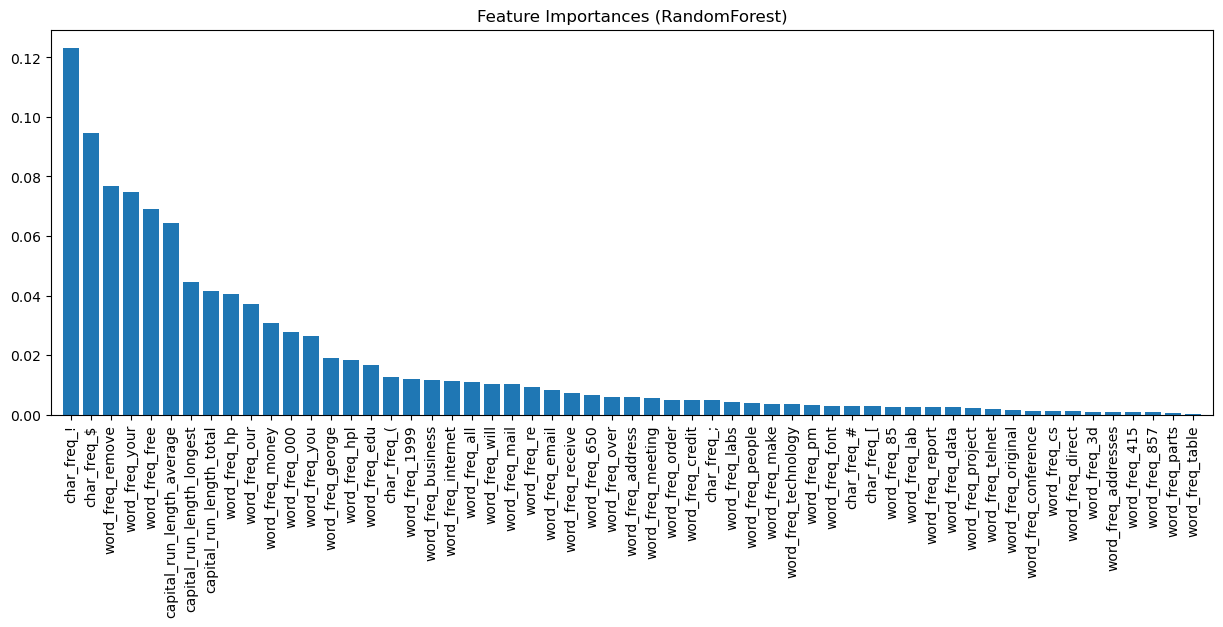

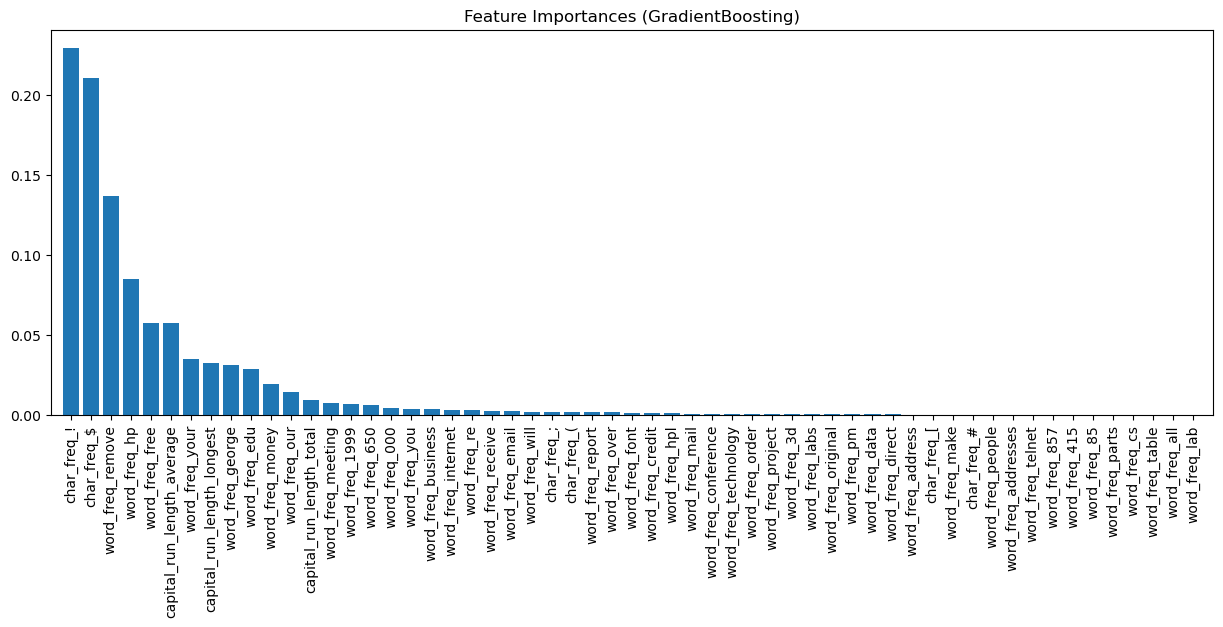

                 feature_label  RF_Importance
0                  char_freq_!       0.123164
1                  char_freq_$       0.094762
2             word_freq_remove       0.076956
3               word_freq_your       0.074673
4               word_freq_free       0.069062
5   capital_run_length_average       0.064399
6   capital_run_length_longest       0.044411
7     capital_run_length_total       0.041666
8                 word_freq_hp       0.040675
9                word_freq_our       0.037169
10             word_freq_money       0.030770
11               word_freq_000       0.027865
12               word_freq_you       0.026392
13            word_freq_george       0.019084
14               word_freq_hpl       0.018401
15               word_freq_edu       0.016720
16                 char_freq_(       0.012733
17              word_freq_1999       0.011980
18          word_freq_business       0.011651
19          word_freq_internet       0.011226
20               word_freq_all    

In [9]:
# Define bar plot for feature importances
def display_feature_importance(importances, indices, title):
    plt.figure(figsize=(15, 5))
    plt.title(title)
    plt.bar(range(len(indices)), importances[indices], align="center")
    plt.xticks(range(len(indices)), [df.columns[i] for i in indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()

# Train the RandomForest model and obtain its feature importances.
rf = RandomForestClassifier(n_estimators=100)
rf.fit(df.drop('spam/ham', axis=1), df['spam/ham'])
rf.fit(df.drop('spam/ham', axis=1), df['spam/ham'])
rf_importances = rf.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

# Display the RandomForest feature importances.
display_feature_importance(rf_importances, rf_indices, "Feature Importances (RandomForest)")

# Train the GradientBoosting model and obtain its feature importances.
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(df.drop('spam/ham', axis=1), df['spam/ham'])
gb_importances = gb.feature_importances_
gb_indices = np.argsort(gb_importances)[::-1]

# Display the GradientBoosting feature importances.
display_feature_importance(gb_importances, gb_indices, "Feature Importances (GradientBoosting)")

# Convert feature lists to DataFrames for both models.
rf_features_df = pd.DataFrame({
    'feature_label': [df.columns[i] for i in rf_indices[:58]],
    'RF_Importance': [rf_importances[i] for i in rf_indices[:58]]
})

gb_features_df = pd.DataFrame({
    'feature_label': [df.columns[i] for i in gb_indices[:58]],
    'GB_Importance': [gb_importances[i] for i in gb_indices[:58]]
})

# Print the resulting DataFrames.
print(rf_features_df)
print('\n')
print(gb_features_df)
print("df type", type(df))
print(df.shape)

rf_features_df type: <class 'pandas.core.frame.DataFrame'>
gb_features_df type: <class 'pandas.core.frame.DataFrame'>
count_df type: <class 'pandas.core.frame.DataFrame'>
Running PCA for: RF Features
Number of components that retain 95% variance: 1
Running PCA for: GB Features
Number of components that retain 95% variance: 1
Running PCA for: Count Features
Number of components that retain 95% variance: 1


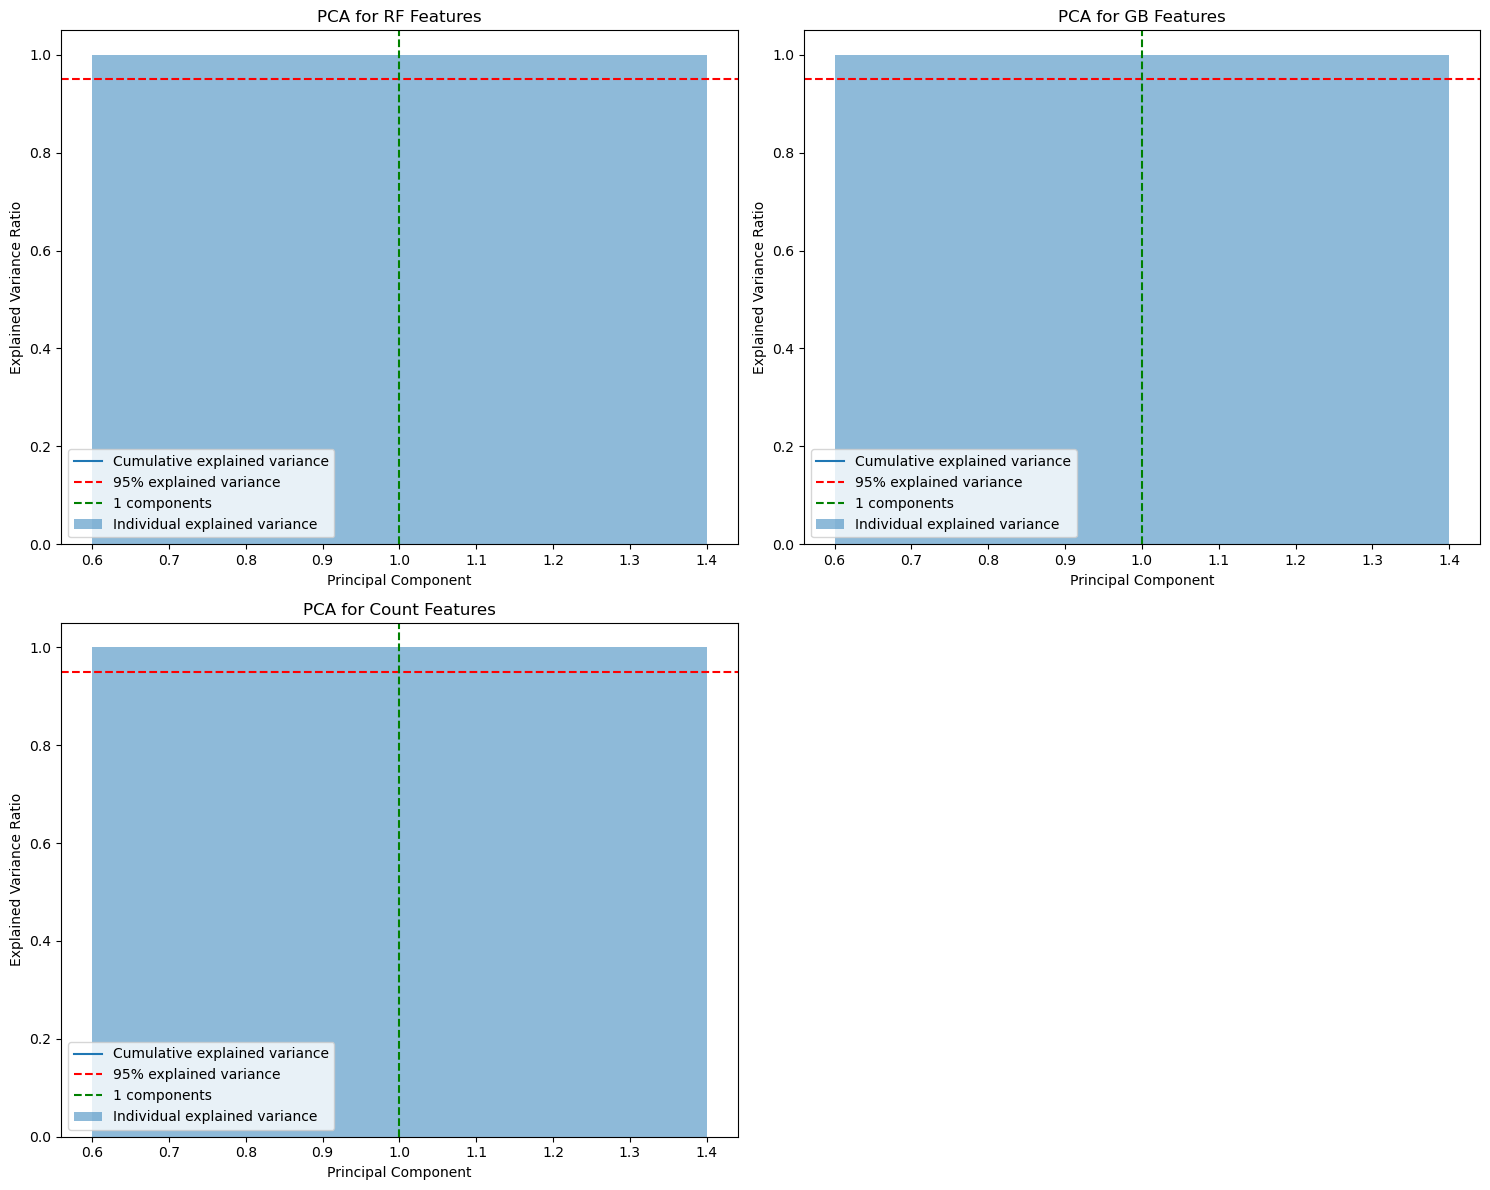

(4601, 58)


In [29]:
# Bring the dataframes together for PCA to check for variance when selecting columns needed
dataframes = {
    "RF Features": rf_features_df,
    "GB Features": gb_features_df,
    "Count Features": count_df
}

print("rf_features_df type:", type(rf_features_df))
print("gb_features_df type:", type(gb_features_df))
print("count_df type:", type(count_df))

# Setting up 2x2 subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))  # Adjust the size to your liking
axs_flat = axs.flatten()  # Flattening the axs for easier looping


# Looping PCA analysis on the dataframes created by feature engineering
for ax, (name, current_df) in zip(axs_flat, dataframes.items()):
    print(f"Running PCA for: {name}")

    # Assuming the label column is named 'feature_label', separate it from the main data
    current_df = current_df.copy()
    labels = current_df['feature_label']
    current_df = current_df.drop('feature_label', axis=1)

    # Standardize the data (excluding the label)
    scaler = StandardScaler()
    current_df_scaled = scaler.fit_transform(current_df)

    # Apply PCA
    pca = PCA()
    df_pca = pca.fit_transform(current_df_scaled)

    # Find the number of components that retain 95% variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance >= 0.95) + 1  

    print(f"Number of components that retain 95% variance: {num_components}")

    # Scree plot
    ax.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
    ax.step(range(1, len(pca.explained_variance_ratio_)+1), cumulative_variance, where='mid', label='Cumulative explained variance')
    ax.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance')
    ax.axvline(x=num_components, color='g', linestyle='--', label=f'{num_components} components')
    ax.set_xlabel('Principal Component')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title(f"PCA for {name}")
    ax.legend(loc='best')


# Blanking the 4th subplot
for i in range(len(dataframes), 4):
    axs_flat[i].axis('off')

plt.tight_layout()
plt.show()

print(df.shape)

In [11]:
# Descriptive statistics for the feature variables
for name, data in dataframes.items():
    # Display the shape of the current DataFrame
    print(f"{name} Shape of DataFrame with selected features: {data.shape}")
    
    # Get descriptive statistics
    print(f"\n{name} Descriptive Statistics of the DataFrame with selected features:\n")
    print(data.describe())
    print('\n')
    
    # Check for duplicate columns
    print(f"{name} Duplicate rows: {data.T.duplicated().sum()}")
    
    # Check for duplicate rows
    print(f"{name} Duplicate columns: {data.duplicated().sum()}")
    
    # Print DataFrame shape for reference
    print(data.shape)
    print('-' * 50)         # line separator for clarity

RF Features Shape of DataFrame with selected features: (57, 2)

RF Features Descriptive Statistics of the DataFrame with selected features:

       RF_Importance
count      57.000000
mean        0.017544
std         0.026265
min         0.000280
25%         0.002524
50%         0.006024
75%         0.018401
max         0.123164


RF Features Duplicate rows: 0
RF Features Duplicate columns: 0
(57, 2)
--------------------------------------------------
GB Features Shape of DataFrame with selected features: (57, 2)

GB Features Descriptive Statistics of the DataFrame with selected features:

       GB_Importance
count      57.000000
mean        0.017544
std         0.045629
min         0.000000
25%         0.000091
50%         0.001110
75%         0.006462
max         0.229437


GB Features Duplicate rows: 0
GB Features Duplicate columns: 0
(57, 2)
--------------------------------------------------
Count Features Shape of DataFrame with selected features: (29, 2)

Count Features Descriptiv

df type: <class 'pandas.core.frame.DataFrame'>
Number of components that retain 95% variance: 49


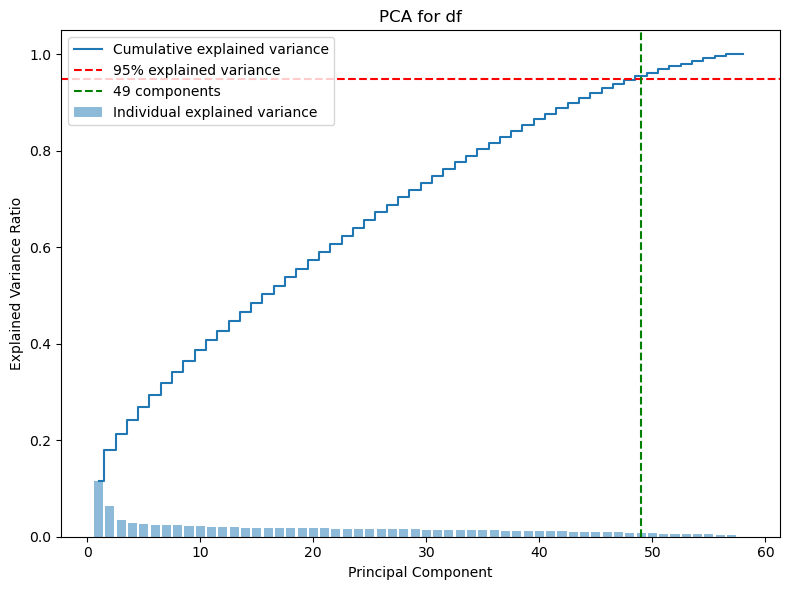

In [31]:
# Print the type of the dataframe
print("df type:", type(df))

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Find the number of components that retain 95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1  
print(f"Number of components that retain 95% variance: {num_components}")

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance')
plt.axvline(x=num_components, color='g', linestyle='--', label=f'{num_components} components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title("PCA for df")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Features shape (Independent) :  (4601, 57)
Labels shape (Dependent)     :  (4601,)
X Train shape: (3680, 57)
X Test shape: (921, 57)
y Train shape: (3680,)
y Test shape: (921,)


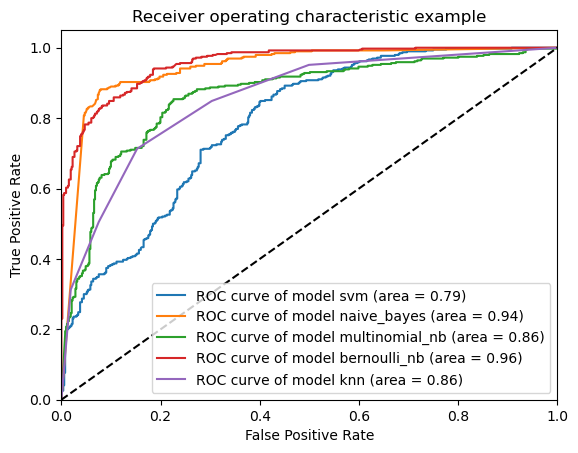

In [12]:
#Comparing the ROC Curves for base models without hypertuning
#Train attributes
X_train = df.drop(['spam/ham'], axis=1).values  
#Train Labels
y_train = df['spam/ham'].values 

# Print the shape of the data
print("Features shape (Independent) : ",X_train.shape)
print("Labels shape (Dependent)     : ", y_train.shape)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shape of the data
print("X Train shape:", X_train.shape)
print("X Test shape:", X_test.shape)
print("y Train shape:", y_train.shape)
print("y Test shape:", y_test.shape)

# Instantiate the models
models = {
    "svm": svm.SVC(probability=True),
    "naive_bayes": naive_bayes.GaussianNB(),
    "multinomial_nb": naive_bayes.MultinomialNB(),
    "bernoulli_nb": naive_bayes.BernoulliNB(),
    "knn": neighbors.KNeighborsClassifier()
}

plt.figure()


for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Generate probabilities
    y_score = model.predict_proba(X_test)[:, 1]  # consider the probability of being "spam"

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC curve of model {0} (area = {1:0.2f})'
                                   ''.format(model_name, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Evaluating Non-Scaled Data:
Model KNN: mean: 0.7973, std: 0.0123
Model SVM: mean: 0.8299, std: 0.0211
Model GNB: mean: 0.8187, std: 0.0210
Model BNB: mean: 0.8856, std: 0.0088

Evaluating Scaled Data:
Model KNN: mean: 0.9065, std: 0.0203
Model SVM: mean: 0.9293, std: 0.0129
Model GNB: mean: 0.8177, std: 0.0221
Model BNB: mean: 0.9024, std: 0.0078


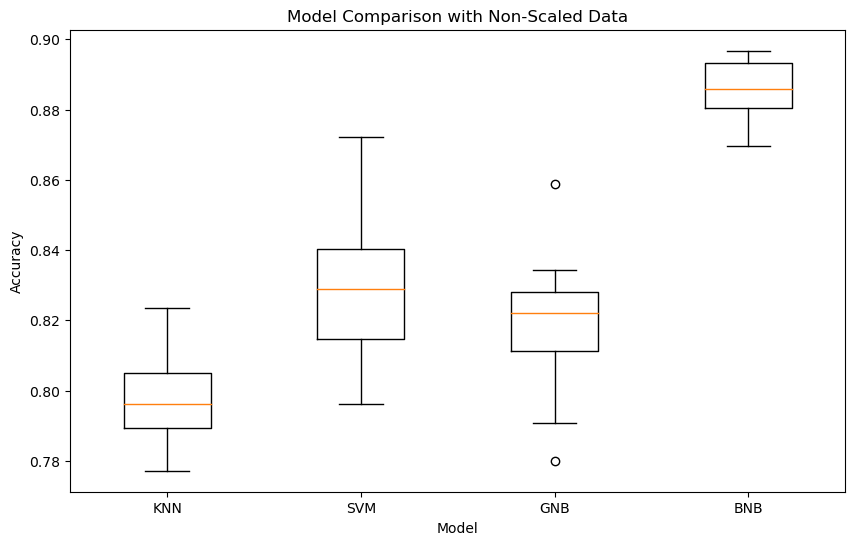

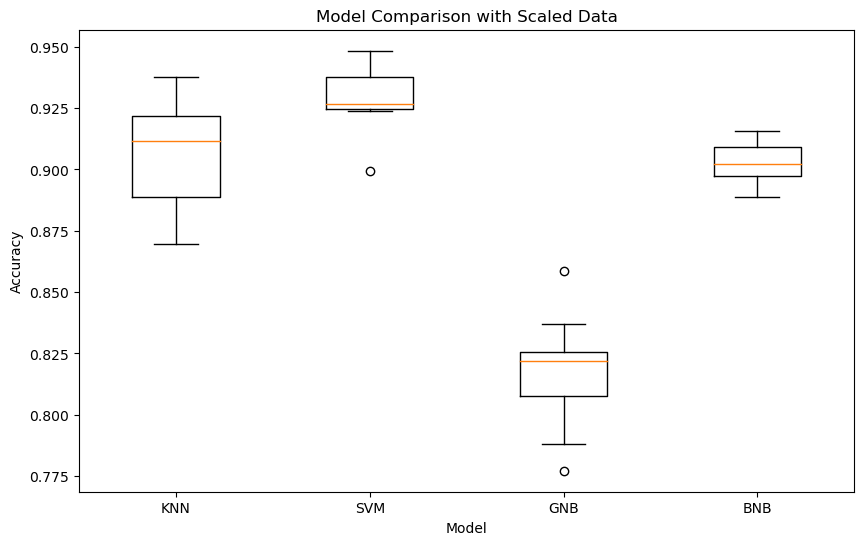

In [13]:
# Test options
num_folds = 10

# Prepare algorithms to evaluate
models = [
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(gamma='auto')),
    ('GNB', GaussianNB()),
    ('BNB', BernoulliNB()),
]

def evaluate_models(models, X, y, num_folds, scale_data=False):
    results = []
    names = []
    kfold = KFold(n_splits=num_folds, random_state=42, shuffle=True)
    
    for name, model in models:
        if scale_data:
            model = Pipeline([('Scaler', StandardScaler()), (name, model)])
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f'Model {name}: mean: {cv_results.mean():.4f}, std: {cv_results.std():.4f}')
        
    return names, results

print("Evaluating Non-Scaled Data:")
names_1, results_1 = evaluate_models(models, X_train, y_train, num_folds, scale_data=False)
print("\nEvaluating Scaled Data:")
names_2, results_2 = evaluate_models(models, X_train, y_train, num_folds, scale_data=True)

# Boxplot for comparison
def plot_results(names, results, title):
    plt.figure(figsize=(10,6))
    plt.boxplot(results)
    plt.title(title)
    plt.xticks(list(range(1,len(names)+1)), names)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.show()

plot_results(names_1, results_1, 'Model Comparison with Non-Scaled Data')
plot_results(names_2, results_2, 'Model Comparison with Scaled Data') 

In [14]:
# Hyperparameter tuning with RandomizedGridSearchCV
classifiers = [
    ('KNN', KNeighborsClassifier(), {'n_neighbors': [1, 5, 11, 15, 21]}),
    ('SVM', SVC(gamma='auto'), {'C': [0.1, 1.0, 2.0]}),
    ('GNB', GaussianNB(), {}),
    ('BNB', BernoulliNB(), {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0]})
]

kfold = KFold(n_splits=num_folds, random_state=1235, shuffle=True)

best_models = {}

for name, model, params in classifiers:
    print(f"\nTuning {name}...\n")
    grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=kfold)
    grid_result = grid.fit(X_train, y_train)  # Use non-scaled data for tuning
    print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
    
    # Instantiate model with best parameters
    if name == "KNN":
        best_models[name] = KNeighborsClassifier(n_neighbors=grid_result.best_params_['n_neighbors'])
    elif name == "SVM":
        best_models[name] = SVC(C=grid_result.best_params_['C'], 
                                gamma='auto')
    elif name == "GNB":
        # For GaussianNB, there's no parameter to optimize
        best_models[name] = grid_result.best_estimator_
    elif name == "BNB":
        best_models[name] = BernoulliNB(alpha=grid_result.best_params_['alpha'])
    
    # Display results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

# The `best_models' dictionary with the optimal hyperparameters
print("\nBest Models with Optimized Hyperparameters:\n", best_models)


Tuning KNN...

Best: 0.807880 using {'n_neighbors': 1}
0.807880 (0.029091) with: {'n_neighbors': 1}
0.797554 (0.007516) with: {'n_neighbors': 5}
0.785054 (0.017962) with: {'n_neighbors': 11}
0.775815 (0.018320) with: {'n_neighbors': 15}
0.769565 (0.020035) with: {'n_neighbors': 21}

Tuning SVM...

Best: 0.839946 using {'C': 2.0}
0.711141 (0.037458) with: {'C': 0.1}
0.826087 (0.018310) with: {'C': 1.0}
0.839946 (0.018044) with: {'C': 2.0}

Tuning GNB...

Best: 0.822554 using {}
0.822554 (0.018392) with: {}

Tuning BNB...

Best: 0.885054 using {'alpha': 0.001}
0.885054 (0.011403) with: {'alpha': 0.001}
0.885054 (0.011403) with: {'alpha': 0.01}
0.885054 (0.011403) with: {'alpha': 0.1}
0.884511 (0.011481) with: {'alpha': 0.5}
0.883967 (0.011141) with: {'alpha': 1.0}

Best Models with Optimized Hyperparameters:
 {'KNN': KNeighborsClassifier(n_neighbors=1), 'SVM': SVC(C=2.0, gamma='auto'), 'GNB': GaussianNB(), 'BNB': BernoulliNB(alpha=0.001)}


In [15]:
# Functions
def train_and_predict(model, X_train, y_train, X_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_pred_train = model.predict(X_train)
    
    # Make predictions on the test data
    y_pred_test = model.predict(X_test)

    # Number of mislabeled points in the training set
    print("Number of mislabeled points out of a total of %d points : %d" % (X_train.shape[0], (y_train != y_pred_train).sum()))

    # Empirical error over 10 folds
    print("Empirical error over 10 folds: {:.2%}".format((y_train != y_pred_train).sum()/X_train.shape[0]))

    # Calculate cross-validation score over 10 folds
    scores = cross_val_score(model, X_train, y_train, cv=25, n_jobs=8, scoring='roc_auc')
    print("Cross-validation score over 10 folds : {:.3%}".format(np.mean(scores)))

    # Print the predictions on the test set
    print("Predictions on the test set: ", y_pred_test)
        
    return y_pred_train, y_pred_test

classes = ['Spam', 'Ham']

def plot_confusion_matrix_and_report(y_test, y_pred, classes, ax):
    # Calculate confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)

    # Using seaborn to visualize confusion matrix
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax)

    # Add x and y labels based on the provided classes list
    ax.set_xticks(np.arange(len(classes))+0.5)
    ax.set_xticklabels(classes, rotation=45)
    
    ax.set_yticks(np.arange(len(classes))+0.5)
    ax.set_yticklabels(classes, rotation=45)

    # Give titles and labels to the plot
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix')

Number of mislabeled points out of a total of 3680 points : 2
Empirical error over 10 folds: 0.05%
Cross-validation score over 10 folds : 80.471%
Predictions on the test set:  [0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0

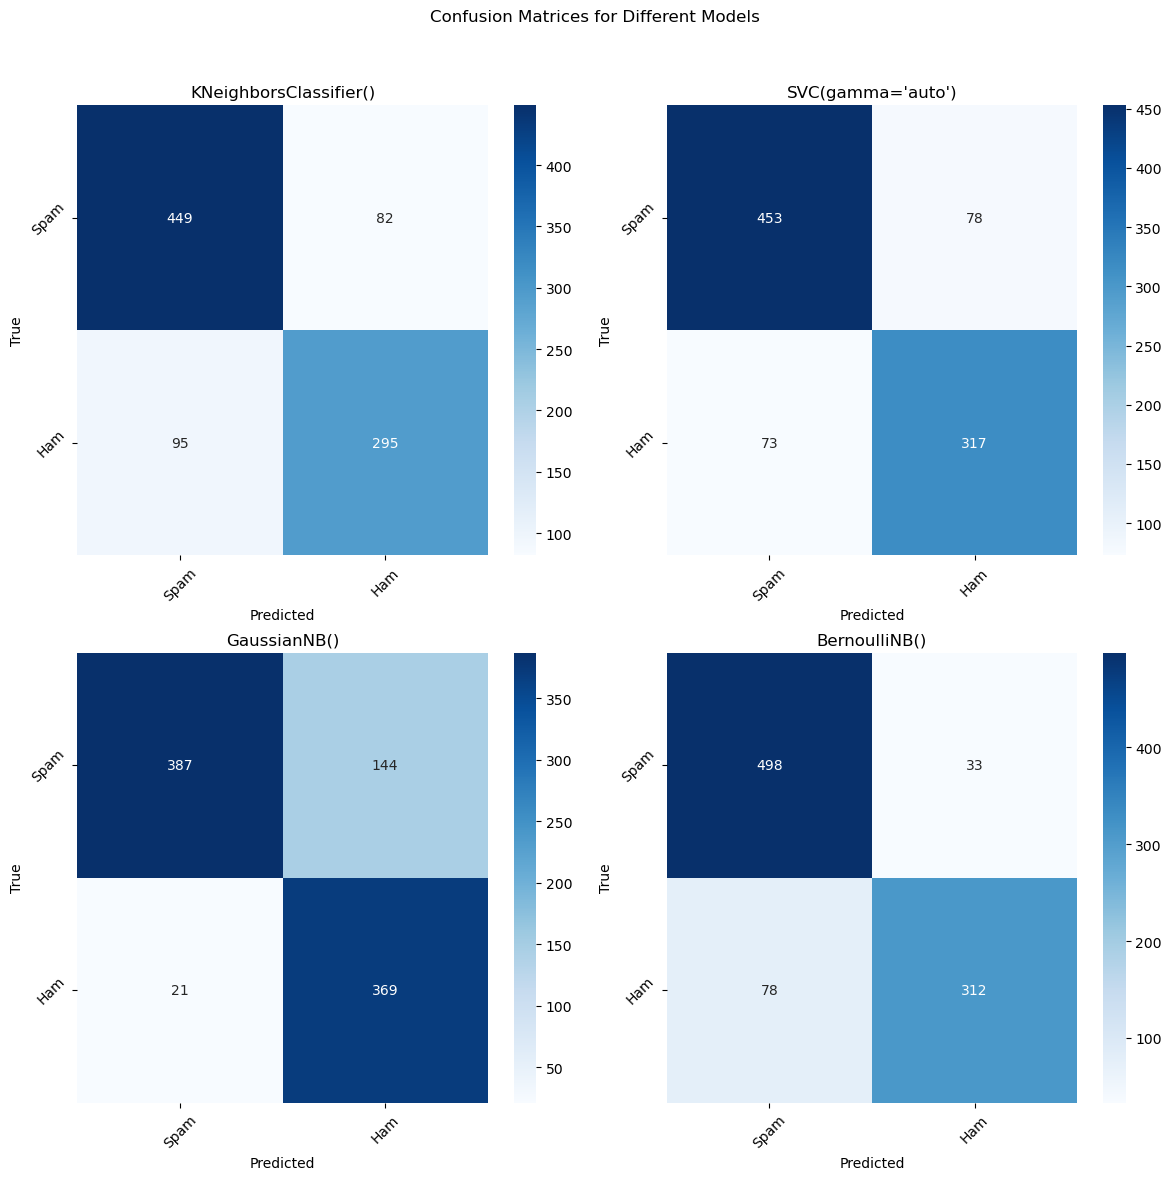

In [16]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.suptitle('Confusion Matrices for Different Models')

# Flatten the 2x2 grid to easily iterate over it
axes = axes.ravel()

# Loop over each model to train, predict, and display confusion matrix
for idx, (model_key, model_name) in enumerate(models):
    y_pred_train, y_pred_test = train_and_predict(best_models[model_key], X_train, y_train, X_test)
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred_test))
    
    plot_confusion_matrix_and_report(y_test, y_pred_test, ['Spam', 'Ham'], ax=axes[idx])
    axes[idx].set_title(model_name)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.90)  # Adjust the top space so the title doesn't overlap
plt.show()

Model AB: mean: 0.9375, std: 0.0103
Model RF: mean: 0.9408, std: 0.0070
Model GB: mean: 0.9448, std: 0.0086


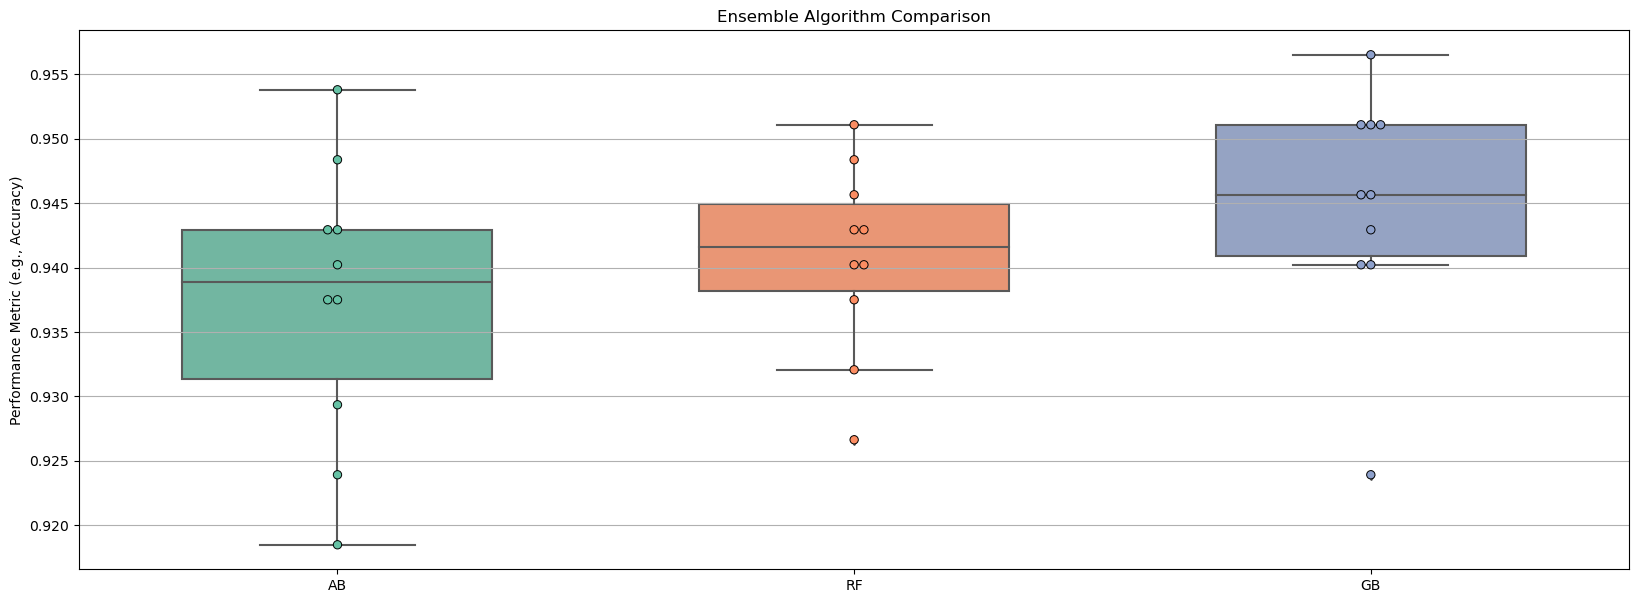

In [17]:
# Evaluate three ensemble models on regular data
ensembles = [('AB', AdaBoostClassifier()), ('RF', RandomForestClassifier(n_estimators=10)),('GB', GradientBoostingClassifier())]
names_ensemble, results_ensemble = evaluate_models(ensembles, X_train, y_train, num_folds, scale_data=False)

# Visualization of ensemble models' performance
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
palette = sns.color_palette("Set2", len(ensembles))
sns.boxplot(data=results_ensemble, width=0.6, palette=palette)
sns.swarmplot(data=results_ensemble, size=6, edgecolor="black", linewidth=0.7, palette=palette)
ax.set_xticklabels(names_ensemble)
ax.set_ylabel("Performance Metric (e.g., Accuracy)")
plt.title('Ensemble Algorithm Comparison')
plt.grid(axis="y")
plt.show()

Stacking Classifier Accuracy: 92.62%
SVM does not support predict_proba method. Skipping...


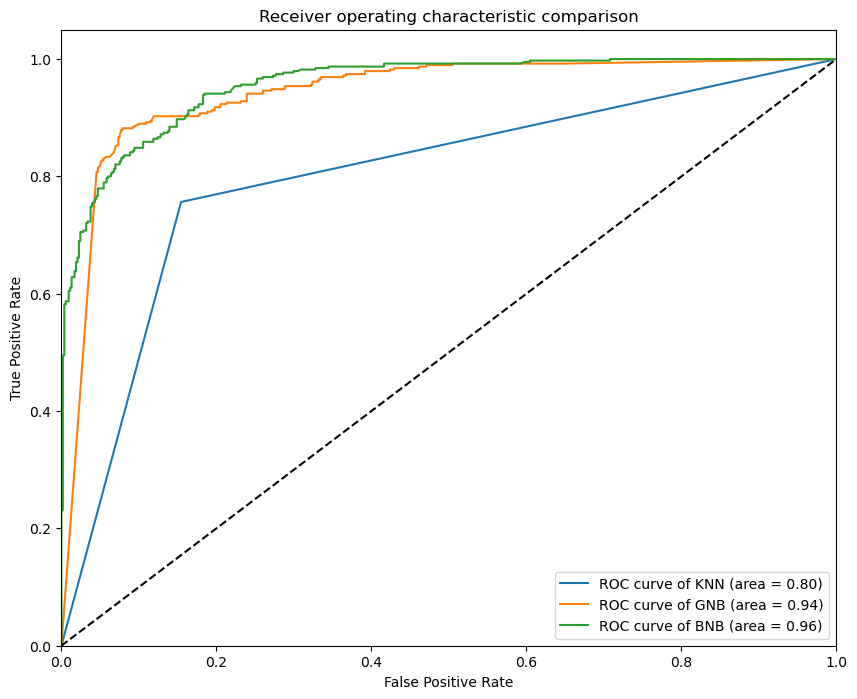

In [18]:
# # Stacking Classifier on hypertuned data
estimators = [(name, model) for name, model in best_models.items()]

# Use a logistic regression as the meta-model
stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking classifier
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)
print("Stacking Classifier Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_stack)))

# Comparing the ROC Curves for each model on the stacked dataset for each model
plt.figure(figsize=(10, 8))
for model_name, model in best_models.items():
    # Checking if model has predict_proba method (Some models might not have it)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]  # consider the probability of being "spam" or class 1

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve of {0} (area = {1:0.2f})'.format(model_name, roc_auc))
    else:
        print(f"{model_name} does not support predict_proba method. Skipping...")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic comparison')
plt.legend(loc="lower right")
plt.show()

In [19]:
# Defining learning curve plot

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Define a function to plot the calibration curve for a given classifier
def plot_calibration_curve(classifier, clf_name, X_train, y_train, X_test, y_test):
    # Create a calibrated version of the classifier
    clf_calibrated = CalibratedClassifierCV(classifier, method='sigmoid', cv=5)
    clf_calibrated.fit(X_train, y_train)
    
    # Predict probabilities
    probs = clf_calibrated.predict_proba(X_test)[:, 1]
    
    # Plot
    plt.figure(figsize=(10, 8))
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, probs, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, 's-', label=f'Calibrated ({clf_name})')
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.ylabel('Fraction of positives')
    plt.xlabel('Mean predicted probability')
    plt.legend(loc='best')
    plt.title(f'Calibration Curve for {clf_name}')
    plt.show()

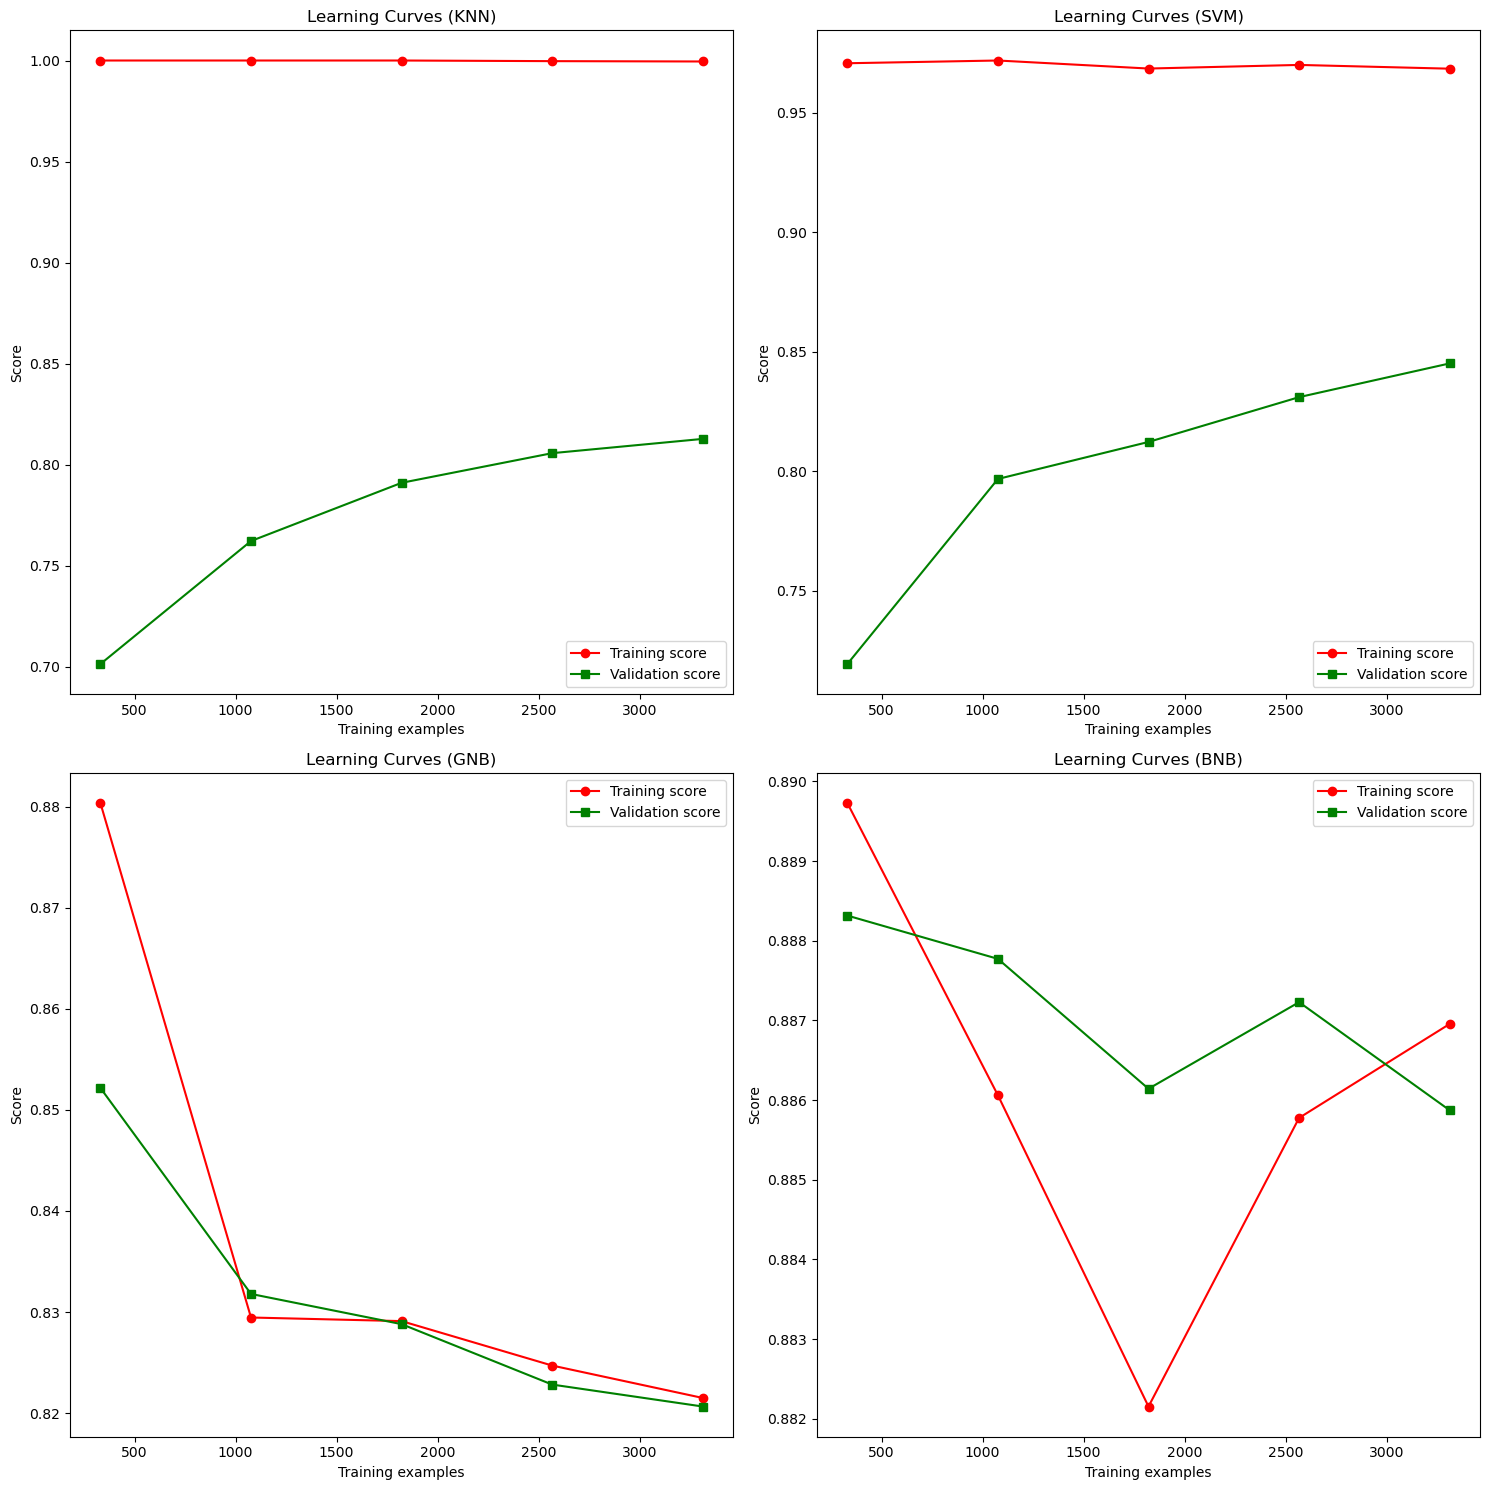

In [20]:
# Setting up the grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15)) 
axes = axes.ravel() 

# Loop through best_models to plot learning curves for each model in separate subplots
for idx, (model_name, model) in enumerate(best_models.items()):
    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    # Plotting the learning curve for the current model in its subplot
    axes[idx].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[idx].plot(train_sizes, test_scores_mean, 's-', color="g", label="Validation score")
    axes[idx].set_title(f"Learning Curves ({model_name})")
    axes[idx].set_xlabel("Training examples")
    axes[idx].set_ylabel("Score")
    axes[idx].legend(loc="best")

# Adjust the layout for better display
plt.tight_layout()
plt.show()

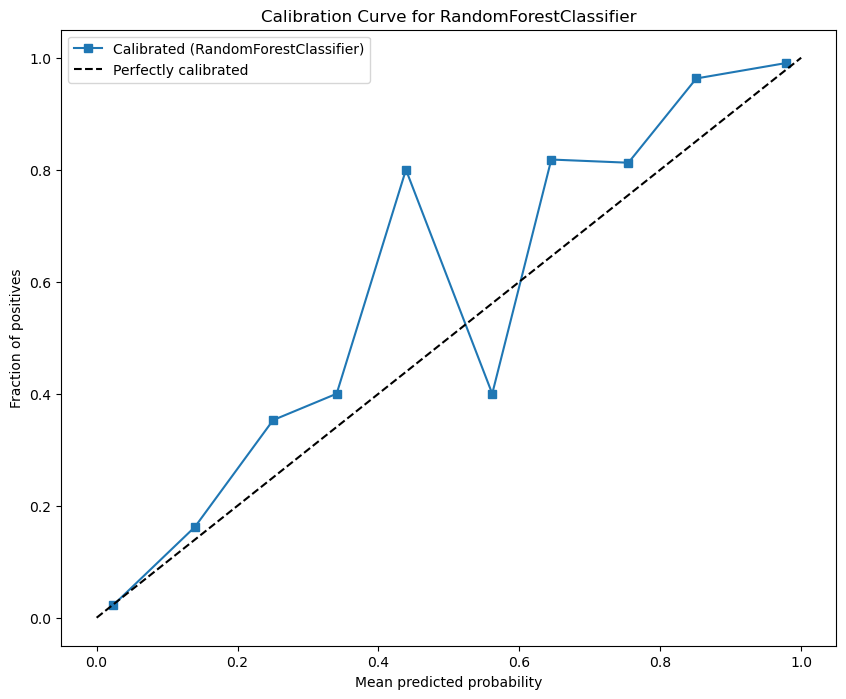

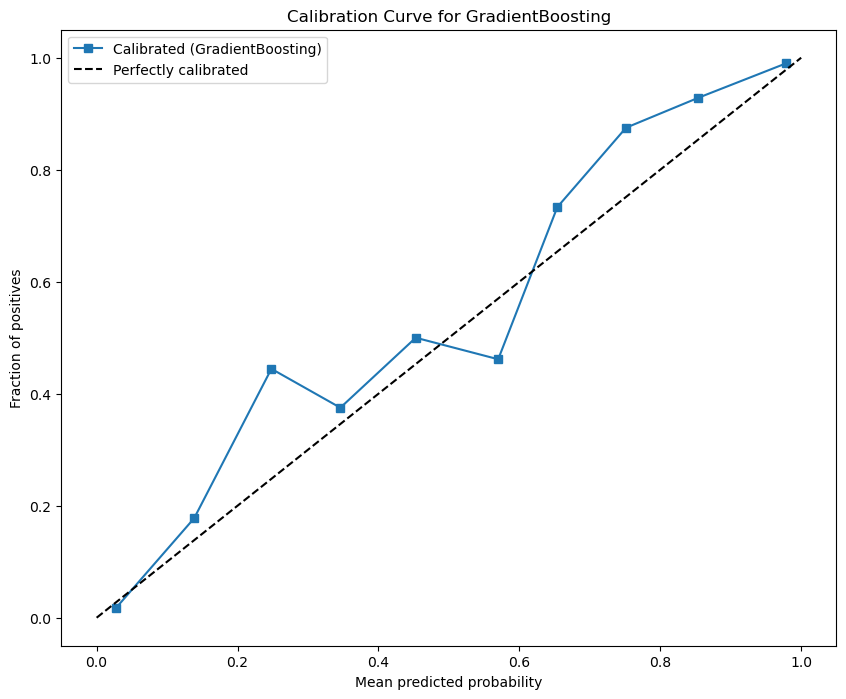

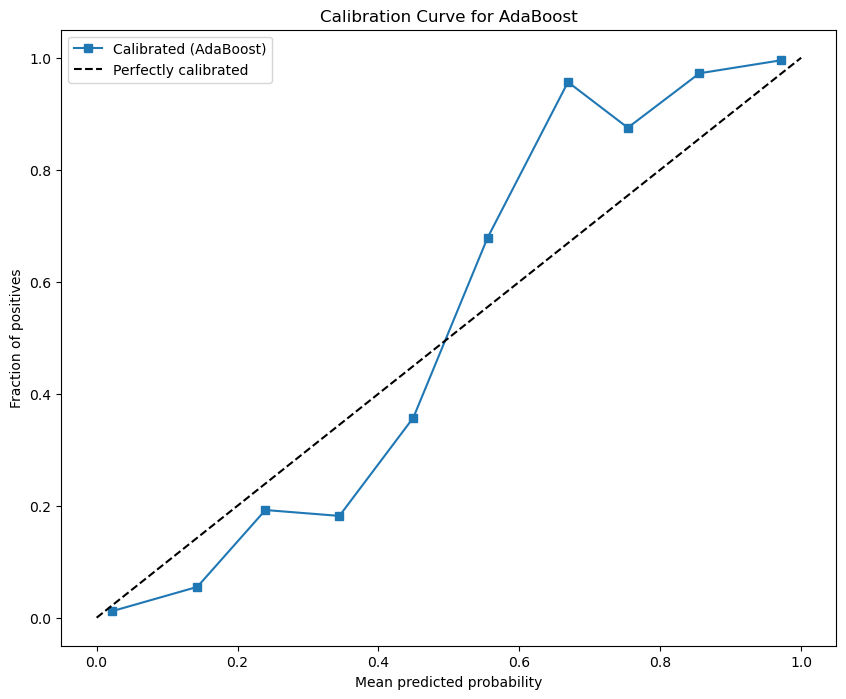

In [21]:
# New classifier for the calibration curve
classifiers = [
    (RandomForestClassifier(n_estimators=50), "RandomForestClassifier"),
    (GradientBoostingClassifier(n_estimators=50), "GradientBoosting"),
    (AdaBoostClassifier(n_estimators=50), "AdaBoost")
]

# Calibration curve loop
for clf, clf_name in classifiers:
    plot_calibration_curve(clf, clf_name, X_train, y_train, X_test, y_test)

In [22]:
#Importing finished data with stacking classifier applied
# Save the trained stacking classifier to disk
joblib.dump(stack_clf, 'stacking_classifier.pkl')

# Use this to load it back
loaded_model = joblib.load('stacking_classifier.pkl')

In [23]:
#Checking folder directory
import os
print(os.getcwd())

with open(r"C:\Users\ljfit\Desktop\Project Repository\UCD Assignment (Clean).html", "r") as f:
    content = f.read()

C:\Users\ljfit\Desktop\Project Repository


In [24]:
#Extracting all images from this jupyter notebook into images folder on file directory.
#Using regex to find all base64 encoded images with the finall method.
#Using a for loop to write these images to file for further use.

import re
import base64

# Directory for the images
if not os.path.exists('extracted_images'):
    os.makedirs('extracted_images')

# Read the HTML content
with open(r"UCD Assignment (Clean).html", "r") as f:
    content = f.read()

# Use regex to find all base64 encoded images
img_data_list = re.findall(r'data:image/png;base64,([^\"]+)', content)

# Iterate through each image and save it
for i, img_data in enumerate(img_data_list, start=1):
    with open(f"extracted_images/image_{i}.png", "wb") as f:
        f.write(base64.b64decode(img_data))